In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('full_data.csv')

In [3]:
# will want to lag variables

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence

/Users/nmolivo/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
df.columns

Index(['DT.NFL.UNAI.CD', 'DT.ODA.OATL.CD', 'DC.DAC.USAL.CD', 'DC.DAC.TOTL.CD',
       'NY.GDP.MKTP.CD', 'NY.GDP.MKTP.KD.ZG', 'NY.GDP.PCAP.CD',
       'SP.POP.DPND.YG', 'SH.CON.1524.FE.ZS', 'SH.CON.1524.MA.ZS',
       'per_si_allsi.cov_pop_tot', 'per_sa_allsa.cov_pop_tot',
       'per_lm_alllm.cov_pop_tot', 'SE.SEC.CUAT.LO.ZS', 'SE.SEC.CUAT.LO.FE.ZS',
       'SE.SEC.CUAT.LO.MA.ZS', 'SE.PRM.CUAT.FE.ZS', 'SE.PRM.CUAT.MA.ZS',
       'SE.PRM.CUAT.ZS', 'SH.HIV.INCD.ZS', 'IT.NET.USER.ZS',
       'SL.TLF.CACT.FE.ZS', 'SL.TLF.CACT.MA.ZS', 'SP.POP.TOTL',
       'SL.UEM.TOTL.ZS', 'Time.Code', 'SH.STA.MMRT', 'SP.DYN.IMRT.IN',
       'SP.DYN.LE00.FE.IN', 'SP.DYN.LE00.MA.IN', 'SP.DYN.LE00.IN', 'WBcode',
       'WBname', 'COWabb', 'COWcode', 'COWname', 'Income', 'MENA', 'year',
       'polity2', 'durable', 'United Nations', 'United States',
       'Joint United Nations Programme on HIV/AIDS (UNAIDS)',
       'United Nations Children`s Fund (UNICEF)',
       'United Nations Democracy Fund (UNDEF)',
  

In [6]:
len(df)

12927

In [7]:
#only count recipients that are from the Middle East/North Africa
df_MENA = df[df.MENA == 1]

In [8]:
#model df
mod_df = df[['SP.POP.TOTL', 'NY.GDP.MKTP.CD', 'NY.GDP.MKTP.KD.ZG', 'NY.GDP.PCAP.CD', 'polity2', 'durable', 
             'United Nations', 'United States', 'United Nations-Womens Aid', 'United States-Womens Aid', 'SE.SEC.CUAT.LO.FE.ZS']]

In [9]:
mod_df = mod_df.dropna()

In [10]:
#mod_df.g

In [11]:
X = mod_df[['SP.POP.TOTL', 'NY.GDP.MKTP.CD', 'NY.GDP.MKTP.KD.ZG', 'NY.GDP.PCAP.CD', 'polity2', 'durable', 
        'United Nations', 'United States', 'United Nations-Womens Aid', 'United States-Womens Aid']]
# Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)
y = mod_df['SE.SEC.CUAT.LO.FE.ZS']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=13)

In [13]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [14]:
gbr.feature_importances_

array([ 0.17122646,  0.07987638,  0.0932641 ,  0.17696845,  0.07764149,
        0.09634014,  0.08188623,  0.1517968 ,  0.04171467,  0.02928526])

In [15]:
from collections import OrderedDict

In [46]:
feat_imp = {}
for i, col in enumerate(list(X.columns)):
    feat_imp[col] = list(gbr.feature_importances_)[i]

In [47]:
feat_imp_df = pd.DataFrame(feat_imp, index=range(0,len(feat_imp)))

In [48]:
feat_imp_df = feat_imp_df.head(1).T

In [49]:
feat_imp_df.columns = ["importance"]

In [50]:
feat_imp_df.sort_values("importance", ascending=False)

,importance
NY.GDP.PCAP.CD,0.176968
SP.POP.TOTL,0.171226
United States,0.151797
durable,0.096340
NY.GDP.MKTP.KD.ZG,0.093264
United Nations,0.081886
NY.GDP.MKTP.CD,0.079876
polity2,0.077641
United Nations-Womens Aid,0.041715
United States-Womens Aid,0.029285


In [21]:
#we're going to need to use time in our data. This doesn't provide much insight to the effectiveness of aid. 
# going to use time and lag women's aid by one year so we can see given the preexisting conditions last year, 
# and the aid last year, what is the impact on women this year?

In [22]:
len(df)

12927

In [23]:
len(df_MENA)

1288

In [24]:
#for all recipients
ts_df = df[['year', 'COWname', 'MENA', 'SP.POP.TOTL', 'NY.GDP.MKTP.CD', 'NY.GDP.MKTP.KD.ZG', 'NY.GDP.PCAP.CD', 'polity2', 'durable', 
             'United Nations', 'United States', 'United Nations-Womens Aid', 'United States-Womens Aid', 
             'SE.SEC.CUAT.LO.FE.ZS']]

In [25]:
ts_df = ts_df.groupby(["year", "COWname", 'MENA'])[['SP.POP.TOTL', 'NY.GDP.MKTP.CD', 'NY.GDP.MKTP.KD.ZG', 'NY.GDP.PCAP.CD', 'polity2', 'durable', 
             'United Nations', 'United States', 'United Nations-Womens Aid', 'United States-Womens Aid', 
             'SE.SEC.CUAT.LO.FE.ZS']].mean().reset_index()

In [26]:
# http://scikit-learn.org/stable/modules/preprocessing.html

In [27]:
ts_df = ts_df[ts_df["United Nations"].notnull() | ts_df["United States"].notnull() | 
      ts_df["United Nations-Womens Aid"].notnull() | ts_df["United States-Womens Aid"].notnull() |
             ts_df['SE.SEC.CUAT.LO.FE.ZS'].notnull()]

In [28]:
ts_df

,year,COWname,MENA,SP.POP.TOTL,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.CD,polity2,durable,United Nations,United States,United Nations-Womens Aid,United States-Womens Aid,SE.SEC.CUAT.LO.FE.ZS
1111,1970.0,Argentina,0.0,2.397306e+07,3.158421e+10,3.045643,1317.487755,-9.0,4.0,NaN,NaN,NaN,NaN,17.100000
1114,1970.0,Belgium,0.0,9.655549e+06,2.684917e+10,5.956940,2780.698810,10.0,26.0,NaN,NaN,NaN,NaN,30.269560
1119,1970.0,Brazil,0.0,9.532679e+07,4.232760e+10,8.769947,444.026268,-9.0,5.0,NaN,NaN,NaN,NaN,10.268030
1125,1970.0,Canada,0.0,2.132400e+07,8.789610e+10,3.255614,4121.932809,10.0,82.0,NaN,NaN,NaN,NaN,61.599998
1128,1970.0,Chile,0.0,9.563865e+06,9.126310e+09,1.828967,954.249117,6.0,15.0,NaN,NaN,NaN,NaN,29.000000
1136,1970.0,Dominican Republic,0.0,4.503114e+06,1.485400e+09,18.226683,329.860648,-3.0,4.0,NaN,NaN,NaN,NaN,12.400000
1147,1970.0,Ghana,0.0,8.596983e+06,2.215029e+09,9.723473,257.651852,3.0,0.0,NaN,NaN,NaN,NaN,7.200000
1151,1970.0,Guyana,0.0,7.049340e+05,2.678000e+08,4.255457,379.893721,1.0,4.0,NaN,NaN,NaN,NaN,8.169460
1154,1970.0,Hungary,0.0,1.033791e+07,NaN,NaN,NaN,-7.0,12.0,NaN,NaN,NaN,NaN,79.247581
1163,1970.0,Jamaica,0.0,1.875381e+06,1.404776e+09,12.064409,749.061695,10.0,11.0,NaN,NaN,NaN,NaN,7.978100


In [29]:
ts_df = ts_df[ts_df["year"]>2000]

In [30]:
ts_df.to_csv('ts_aid_df.csv')

In [31]:
ts_df[ts_df['year']==2011][20:90]

,year,COWname,MENA,SP.POP.TOTL,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.CD,polity2,durable,United Nations,United States,United Nations-Womens Aid,United States-Womens Aid,SE.SEC.CUAT.LO.FE.ZS
7015,2011.0,Cambodia,0.0,1.453789e+07,1.282954e+10,7.069570,882.490146,2.0,13.0,17788873.0,80591166.0,5105937.0,31062876.0,NaN
7016,2011.0,Cameroon,0.0,2.052045e+07,2.658731e+10,4.140592,1295.649726,-4.0,19.0,13501535.0,23516917.0,2717967.0,7657932.0,NaN
7018,2011.0,Cape Verde,0.0,5.080670e+05,1.864824e+09,3.968886,3670.429453,10.0,20.0,3119496.0,6745059.0,1345000.0,0.0,NaN
7019,2011.0,Central African Republic,0.0,4.476153e+06,2.212700e+09,3.300719,494.330678,-1.0,8.0,12396168.0,17222863.0,1654944.0,503908.0,NaN
7020,2011.0,Chad,0.0,1.228865e+07,1.215638e+10,0.082870,989.236363,-2.0,19.0,28048614.0,150203954.0,5112055.0,175000.0,NaN
7021,2011.0,Chile,0.0,1.715336e+07,2.522520e+11,6.110919,14705.692420,10.0,22.0,2883867.0,1576106.0,319683.0,0.0,71.150948
7022,2011.0,China,0.0,1.344130e+09,7.572550e+12,9.536443,5633.796106,-7.0,62.0,22756111.0,38860575.0,4024802.0,5121608.0,NaN
7023,2011.0,Colombia,0.0,4.640665e+07,3.354150e+11,6.589512,7227.739680,7.0,54.0,3781290.0,267021652.0,1315449.0,408169.0,45.928181
7024,2011.0,Comoros,0.0,7.065690e+05,5.862818e+08,2.600000,829.758688,9.0,5.0,2892480.0,150099.0,538190.0,85904.0,NaN
7025,2011.0,Congo,0.0,4.512730e+06,1.442561e+10,3.420621,3196.647534,-4.0,14.0,5721319.0,4276011.0,1469389.0,0.0,NaN


In [32]:
#for MENA
ts_MENA = df_MENA[['year','COWname', 'SP.POP.TOTL', 'NY.GDP.MKTP.CD', 'NY.GDP.MKTP.KD.ZG', 'NY.GDP.PCAP.CD', 'polity2', 'durable', 
             'United Nations', 'United States', 'United Nations-Womens Aid', 'United States-Womens Aid', 
             'SE.SEC.CUAT.LO.FE.ZS']]

In [33]:
ts_MENA = ts_MENA.groupby(["year", 'COWname'])[['SP.POP.TOTL', 'NY.GDP.MKTP.CD', 'NY.GDP.MKTP.KD.ZG', 'NY.GDP.PCAP.CD', 'polity2', 'durable', 
             'United Nations', 'United States', 'United Nations-Womens Aid', 'United States-Womens Aid', 
             'SE.SEC.CUAT.LO.FE.ZS']].mean().reset_index()

In [34]:
ts_MENA = ts_MENA[ts_MENA["United Nations"].notnull() | ts_MENA["United States"].notnull() | 
      ts_MENA["United Nations-Womens Aid"].notnull() | ts_MENA["United States-Womens Aid"].notnull() | ts_MENA['SE.SEC.CUAT.LO.FE.ZS'].notnull()]

In [35]:
ts_MENA = ts_MENA[ts_MENA["year"]>2000]

In [36]:
ts_MENA[ts_MENA["SE.SEC.CUAT.LO.FE.ZS"].notnull()]

,year,COWname,SP.POP.TOTL,NY.GDP.MKTP.CD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.CD,polity2,durable,United Nations,United States,United Nations-Womens Aid,United States-Womens Aid,SE.SEC.CUAT.LO.FE.ZS
712,2001.0,Bahrain,697549.0,8.976208e+09,2.491034,12868.211000,-8.0,26.0,14545.0,0.000000e+00,14545.0,0.0,56.949680
744,2002.0,Syria,17087901.0,2.158225e+10,5.900000,1263.013455,-7.0,39.0,7139580.0,6.147700e+04,5077285.0,0.0,25.642570
755,2003.0,Jordan,5396774.0,1.019566e+10,4.161050,1889.213962,-2.0,14.0,2475502.0,1.160931e+09,697637.0,38378254.0,40.492531
760,2003.0,Oman,2385255.0,2.163381e+10,-2.668969,9069.810206,-8.0,46.0,1707639.0,1.794280e+05,0.0,0.0,32.746529
773,2004.0,Israel and Palestine,6809000.0,1.354190e+11,5.114052,19888.172000,6.0,23.0,0.0,6.498880e+08,0.0,0.0,40.150829
780,2004.0,Qatar,758855.0,3.173407e+10,19.218915,41818.352560,-10.0,33.0,NaN,NaN,NaN,NaN,58.795921
781,2004.0,Saudi Arabia,23228890.0,2.587420e+11,7.958442,11138.807460,-10.0,78.0,0.0,2.600140e+05,0.0,0.0,42.939011
784,2004.0,Turkey,67007855.0,4.047760e+11,9.644323,6040.729530,7.0,21.0,4547180.0,1.210940e+07,874774.0,0.0,19.993650
794,2005.0,Kuwait,2276623.0,8.079795e+10,10.075951,35490.261320,-7.0,41.0,NaN,NaN,NaN,NaN,46.413158
803,2005.0,Turkey,67903406.0,5.014230e+11,9.009853,7384.354661,7.0,22.0,5856499.0,2.167756e+07,770279.0,0.0,20.935030


In [37]:
ts_df = ts_df[ts_df["United Nations"].notnull() | ts_df["United States"].notnull() | 
      ts_df["United Nations-Womens Aid"].notnull() | ts_df["United States-Womens Aid"].notnull()]

In [38]:
barch = ts_df[ts_df['year'] ==2013][['COWname', 'MENA', 'United Nations', 'United States', 'United Nations-Womens Aid', 
                             'United States-Womens Aid']]

In [39]:
mena_barchart = barch[barch['MENA']==1]

In [40]:
mena_barchart

,COWname,MENA,United Nations,United States,United Nations-Womens Aid,United States-Womens Aid
7310,Algeria,1.0,3320511.0,12753801.0,109340.0,10329.0
7350,Egypt,1.0,9347608.0,395535391.0,1284985.0,3256126.0
7373,Iran,1.0,4352470.0,604482.0,1403384.0,0.0
7374,Iraq,1.0,11646910.0,600398365.0,908375.0,31.0
7381,Jordan,1.0,126088500.0,701309461.0,301998.0,15365461.0
7388,Lebanon,1.0,85272339.0,295566009.0,368171.0,0.0
7391,Libya,1.0,4432137.0,18444804.0,7047.0,0.0
7405,Morocco and Western Sahara,1.0,4157728.0,49141451.0,642934.0,25358.0
7445,Syria,1.0,48232480.0,696430870.0,2027795.0,0.0
7451,Tunisia,1.0,2706866.0,75697482.0,137636.0,23158.0


In [41]:
mena_barchart.drop('MENA', axis =1, inplace=True)

/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [42]:
mena_barchart

,COWname,United Nations,United States,United Nations-Womens Aid,United States-Womens Aid
7310,Algeria,3320511.0,12753801.0,109340.0,10329.0
7350,Egypt,9347608.0,395535391.0,1284985.0,3256126.0
7373,Iran,4352470.0,604482.0,1403384.0,0.0
7374,Iraq,11646910.0,600398365.0,908375.0,31.0
7381,Jordan,126088500.0,701309461.0,301998.0,15365461.0
7388,Lebanon,85272339.0,295566009.0,368171.0,0.0
7391,Libya,4432137.0,18444804.0,7047.0,0.0
7405,Morocco and Western Sahara,4157728.0,49141451.0,642934.0,25358.0
7445,Syria,48232480.0,696430870.0,2027795.0,0.0
7451,Tunisia,2706866.0,75697482.0,137636.0,23158.0


In [43]:
mena_barchart.describe()

,United Nations,United States,United Nations-Womens Aid,United States-Womens Aid
count,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01
mean,2.688950e+07,2.618241e+08,7.639490e+05,1.729207e+06
std,3.993747e+07,2.733115e+08,6.725244e+05,4.422095e+06
min,2.584167e+06,6.044820e+05,7.047000e+03,0.000000e+00
25%,3.948424e+06,4.146729e+07,2.609075e+05,0.000000e+00
50%,6.889872e+06,1.484543e+08,5.055525e+05,5.180000e+03
75%,2.745731e+07,4.467511e+08,1.314585e+06,5.365240e+05
max,1.260885e+08,7.013095e+08,2.027795e+06,1.536546e+07


In [44]:
%matplotlib inline

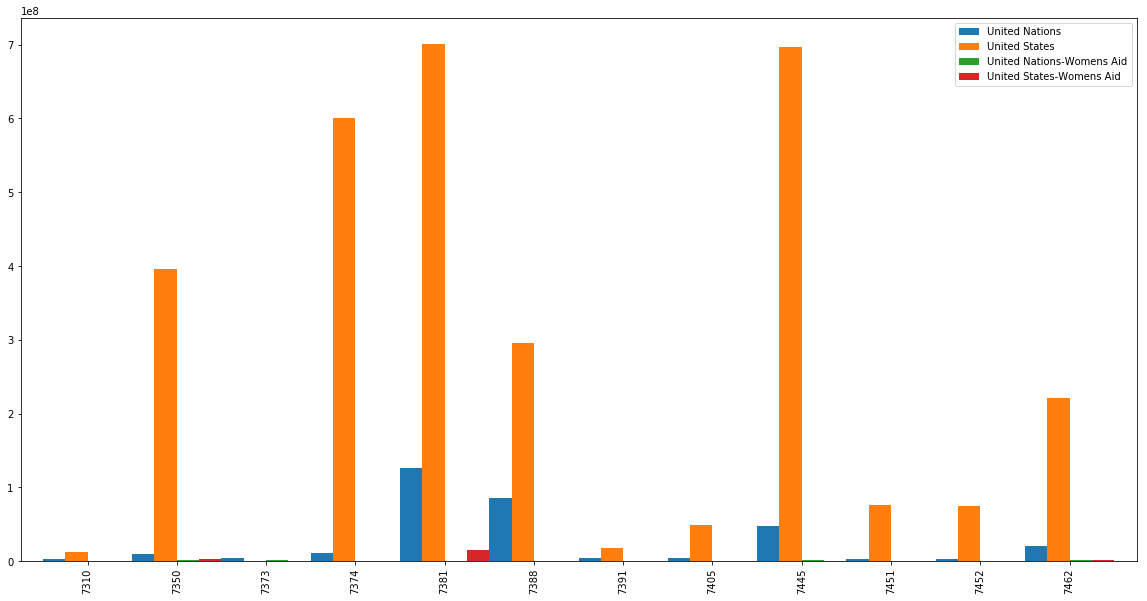

In [45]:
mena_barchart.plot.bar(figsize=(20,10), width=1.0)